# Investigate the Noise Pattern in MRE t2stack images 

In [1]:
import os
from pathlib import Path
import numpy as np
import scipy.io as sio
import h5py

In [5]:
input_mat = "/home/smooi/Desktop/mre_noise_unprocessed/S038/STE_018_scan1_imgraw.mat"           # path to your magimg.mat (upload or point to Drive)
save_dir  = "/home/smooi/Desktop/mre_noise_unprocessed/S038"        # where to save the outputs
os.makedirs(save_dir, exist_ok=True)

In [ ]:
# import os
# import numpy as np
# from scipy.io import loadmat, savemat

# def process_mri_noise_profile(input_mat, save_dir):
#     """
#     Obtain noise profile from MRI data
#     Translated from MATLAB code by Helen Liang
    
#     Args:
#         input_mat (str): Path to magimg.mat file
#         save_dir (str): Directory to save the noise profile outputs
#     """
    
#     # Extract subject name from the input path
#     # Get the parent directory of the .mat file
#     parent_dir = os.path.dirname(input_mat)
#     subject_name = os.path.basename(parent_dir)
#     print(f"Subject name: {subject_name}")
    
#     # Load the magimg.mat file
#     print(f"Loading: {input_mat}")
#     data = loadmat(input_mat)
#     magimg = data['magimg']
    
#     print(f"magimg shape: {magimg.shape}")
#     print(f"Number of dimensions: {magimg.ndim}")
    
#     # Adjust the mean calculation based on actual dimensions
#     # MATLAB: t2stack = mean(mean(mean(magimg,6),5),4);
#     # Need to adapt based on actual array dimensions
#     if magimg.ndim == 6:
#         # Original case: mean across dimensions 6, 5, and 4 (0-indexed: 5, 4, 3)
#         t2stack = np.mean(np.mean(np.mean(magimg, axis=5), axis=4), axis=3)
#         noise_reference = magimg[:, :, :, 0, 3]  # magimg(:,:,:,1,4) in MATLAB
#     elif magimg.ndim == 5:
#         # Adapted case: mean across dimensions 5 and 4 (0-indexed: 4, 3)
#         t2stack = np.mean(np.mean(magimg, axis=4), axis=3)
#         noise_reference = magimg[:, :, :, 0, 3]  # magimg(:,:,:,1,4) in MATLAB
#     elif magimg.ndim == 4:
#         # Further adapted case: mean across dimension 4 (0-indexed: 3)
#         t2stack = np.mean(magimg, axis=3)
#         noise_reference = magimg[:, :, :, 0]  # magimg(:,:,:,1) in MATLAB
#     else:
#         raise ValueError(f"Unexpected number of dimensions: {magimg.ndim}")
    
#     print(f"t2stack shape: {t2stack.shape}")
    
#     # Calculate noise
#     # MATLAB: noise = t2stack - abs(magimg(:,:,:,1,4));
#     # Note: MATLAB uses 1-based indexing, Python uses 0-based
#     # print(noise_reference.shape)
#     noise = t2stack - np.abs(noise_reference)
    
#     # Scale noise by 1000
#     noise_scaled = noise * 1000
    
#     # Calculate t2noise
#     t2noise = t2stack + noise
    
#     # Create save directory if it doesn't exist
#     os.makedirs(save_dir, exist_ok=True)
    
#     # Save the results
#     filename = os.path.join(save_dir, f"{subject_name}_noise.mat")
    
#     # Save to .mat file (MATLAB compatible)
#     savemat(filename, {
#         'noise': noise,
#         'noise_scaled': noise_scaled,
#         't2noise': t2noise
#     })
    
#     print(f"Noise saved as: {filename}")
    
#     return noise, noise_scaled, t2noise

# # Example usage with your specified paths
# if __name__ == "__main__":
#     input_mat = "/home/smooi/Desktop/mre_noise_unprocessed/G025/magimg.mat"
#     save_dir = "/home/smooi/Desktop/mre_noise_unprocessed/G025"
    
#     # Process the noise profile
#     noise, noise_scaled, t2noise = process_mri_noise_profile(input_mat, save_dir)
    
#     print("Processing complete!")
#     print(f"Noise shape: {noise.shape}")
#     print(f"Noise scaled shape: {noise_scaled.shape}")
#     print(f"T2noise shape: {t2noise.shape}")

Subject name: G025
Loading: /home/smooi/Desktop/mre_noise_unprocessed/G025/magimg.mat
magimg shape: (128, 128, 48, 3, 4)
Number of dimensions: 5
t2stack shape: (128, 128, 48)
Noise saved as: /home/smooi/Desktop/mre_noise_unprocessed/G025/G025_noise.mat
Processing complete!
Noise shape: (128, 128, 48)
Noise scaled shape: (128, 128, 48)
T2noise shape: (128, 128, 48)


Subject name: G025
Loading: /home/smooi/Desktop/mre_noise_unprocessed/G025/magimg.mat
magimg shape: (128, 128, 48, 3, 4)
Number of dimensions: 5
t2stack shape: (128, 128, 48)
Noise saved as: /home/smooi/Desktop/mre_noise_unprocessed/G025/G025_noise.mat

=== MAGIMG VISUALIZATION ===
Shape: (128, 128, 48, 3, 4)
Data type: int16
Value range: -3141.0000 to 3141.0000
Dimensions: Height=128, Width=128, Slices=48, Time/Echo=3, Phase=4


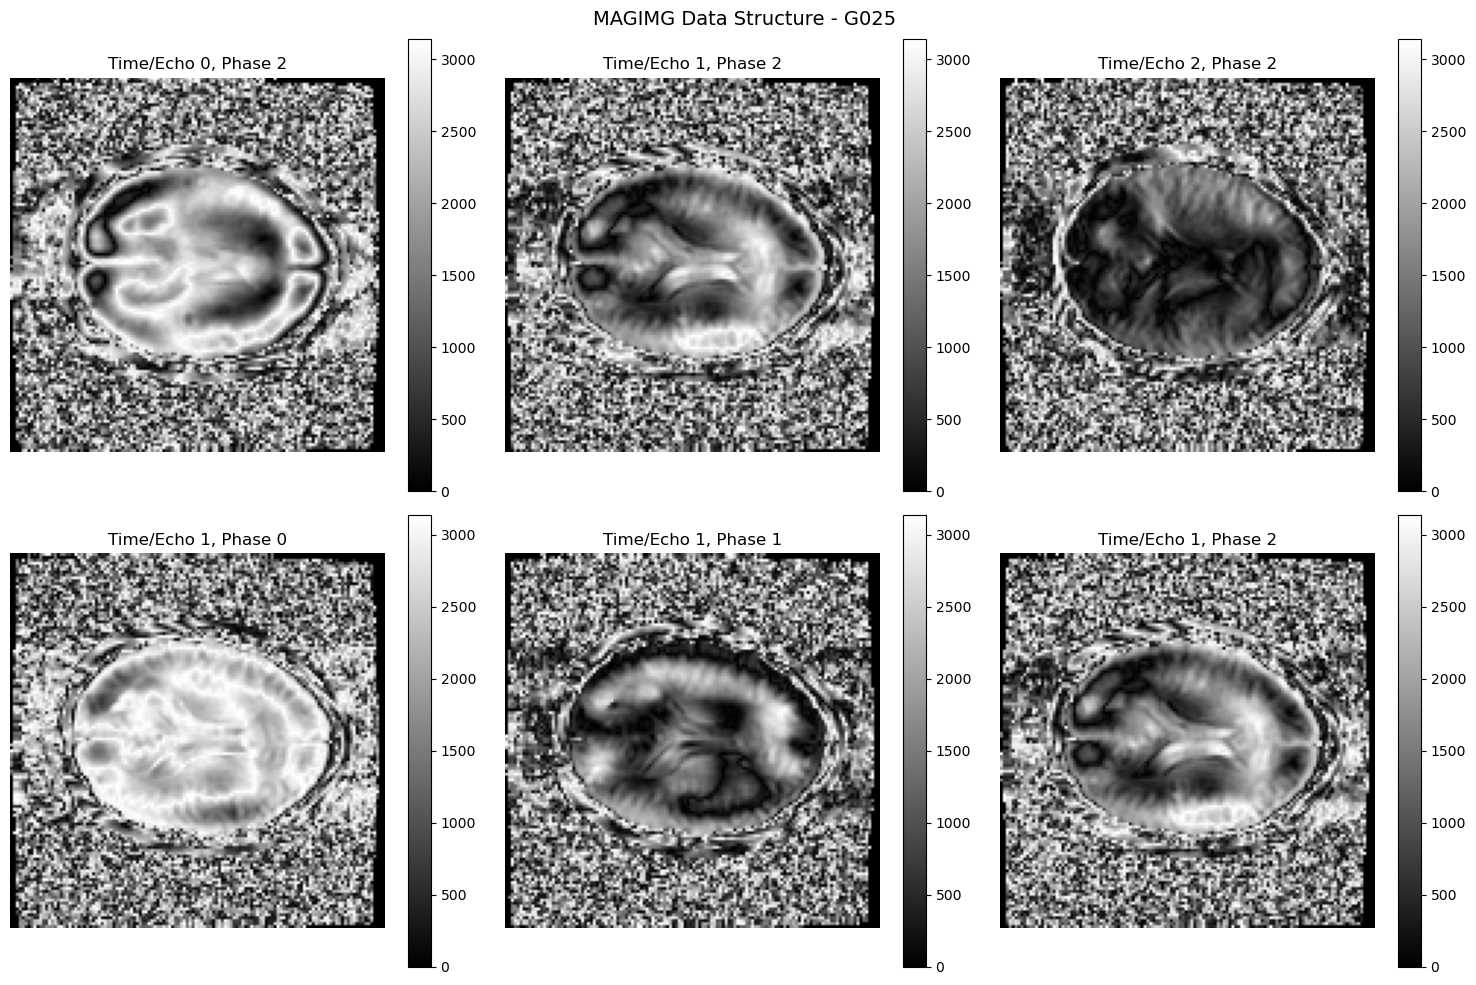

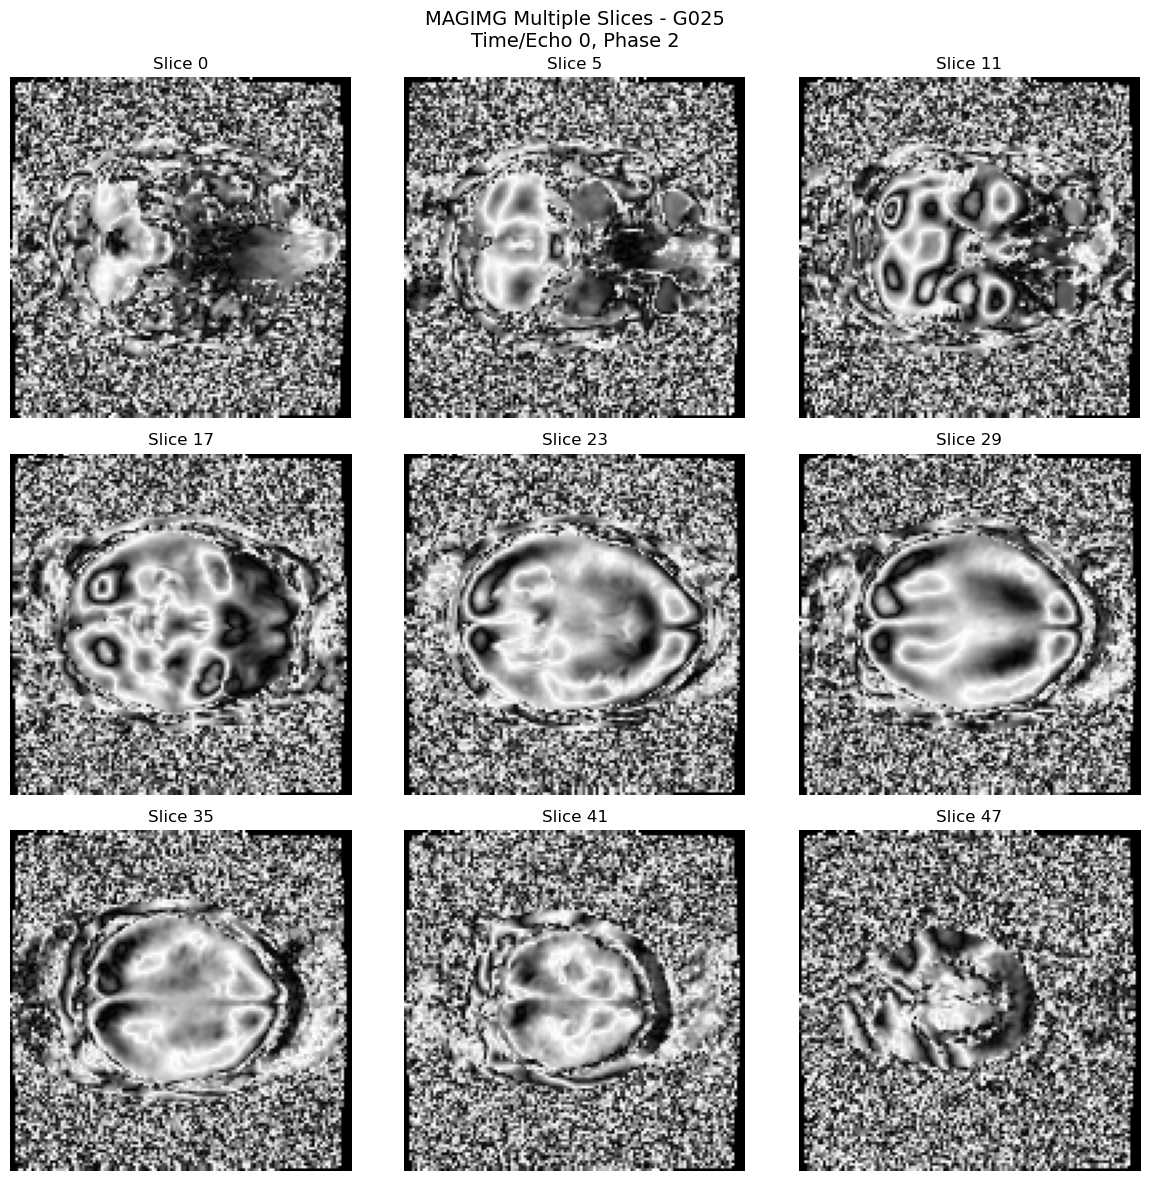

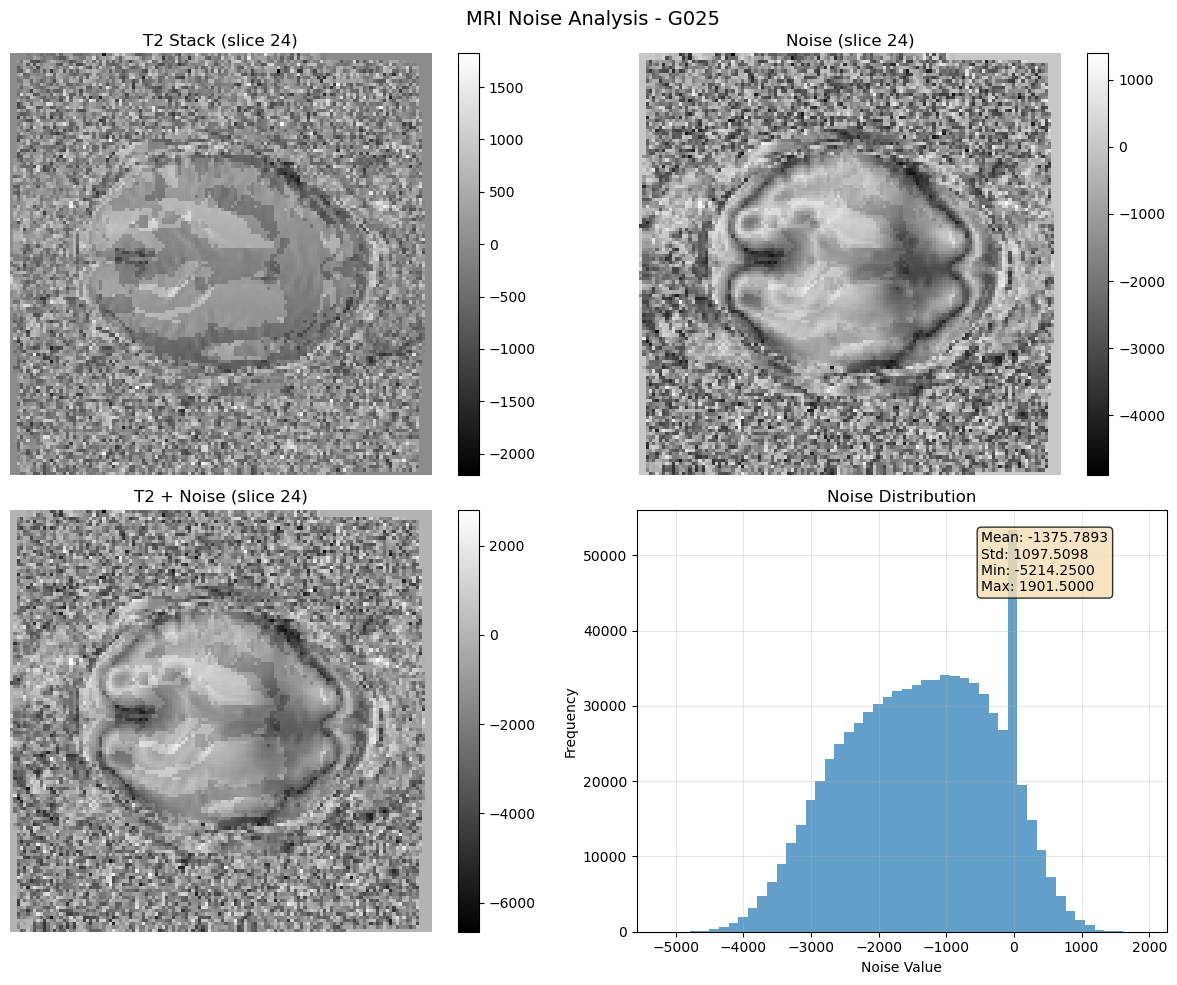

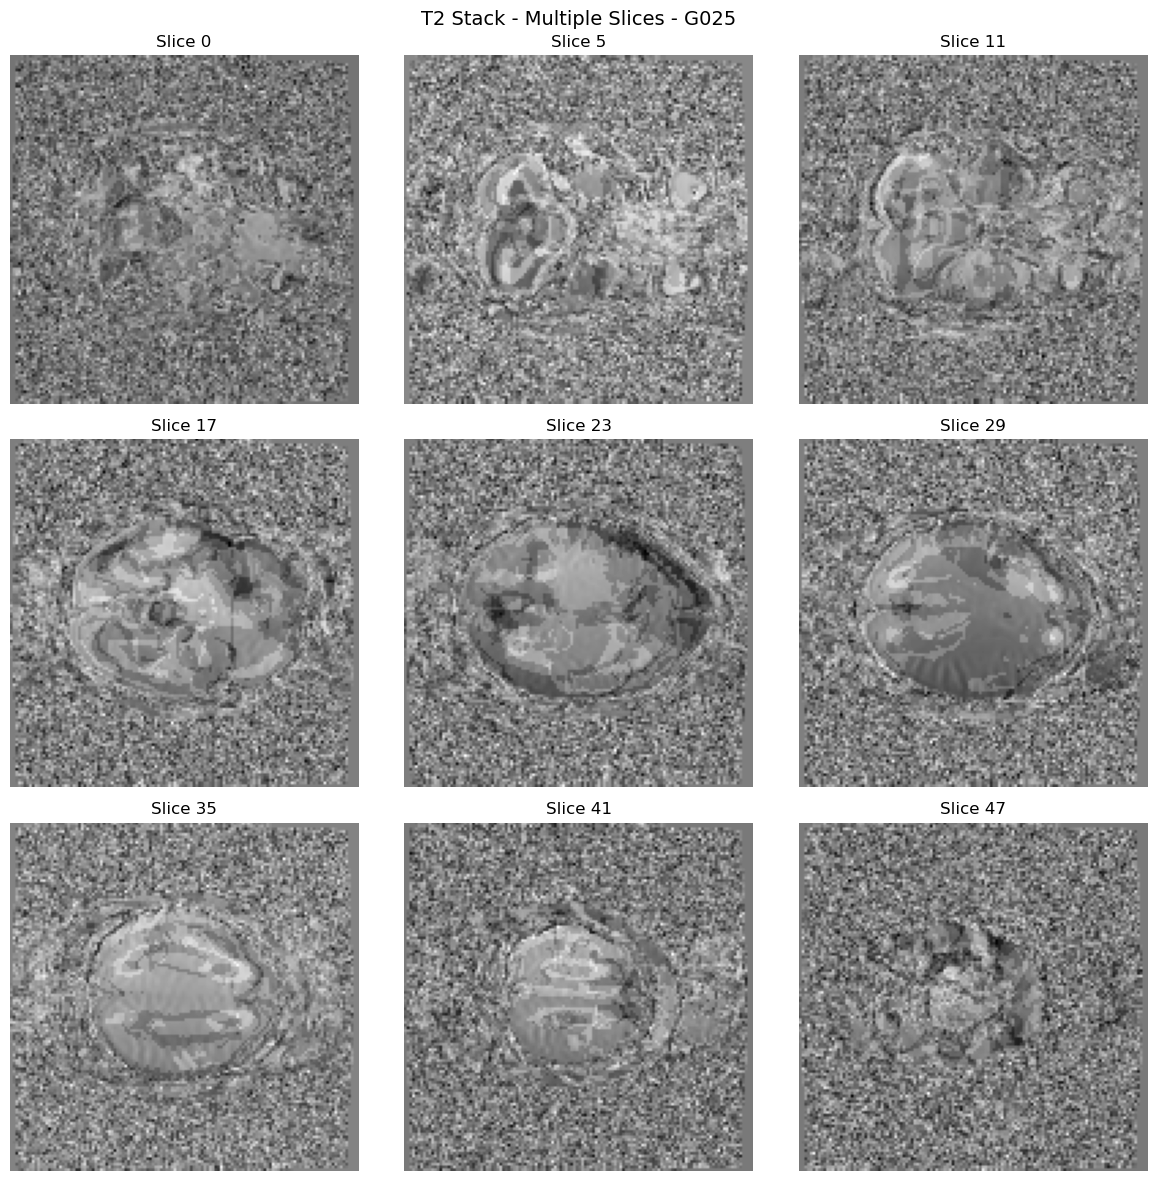

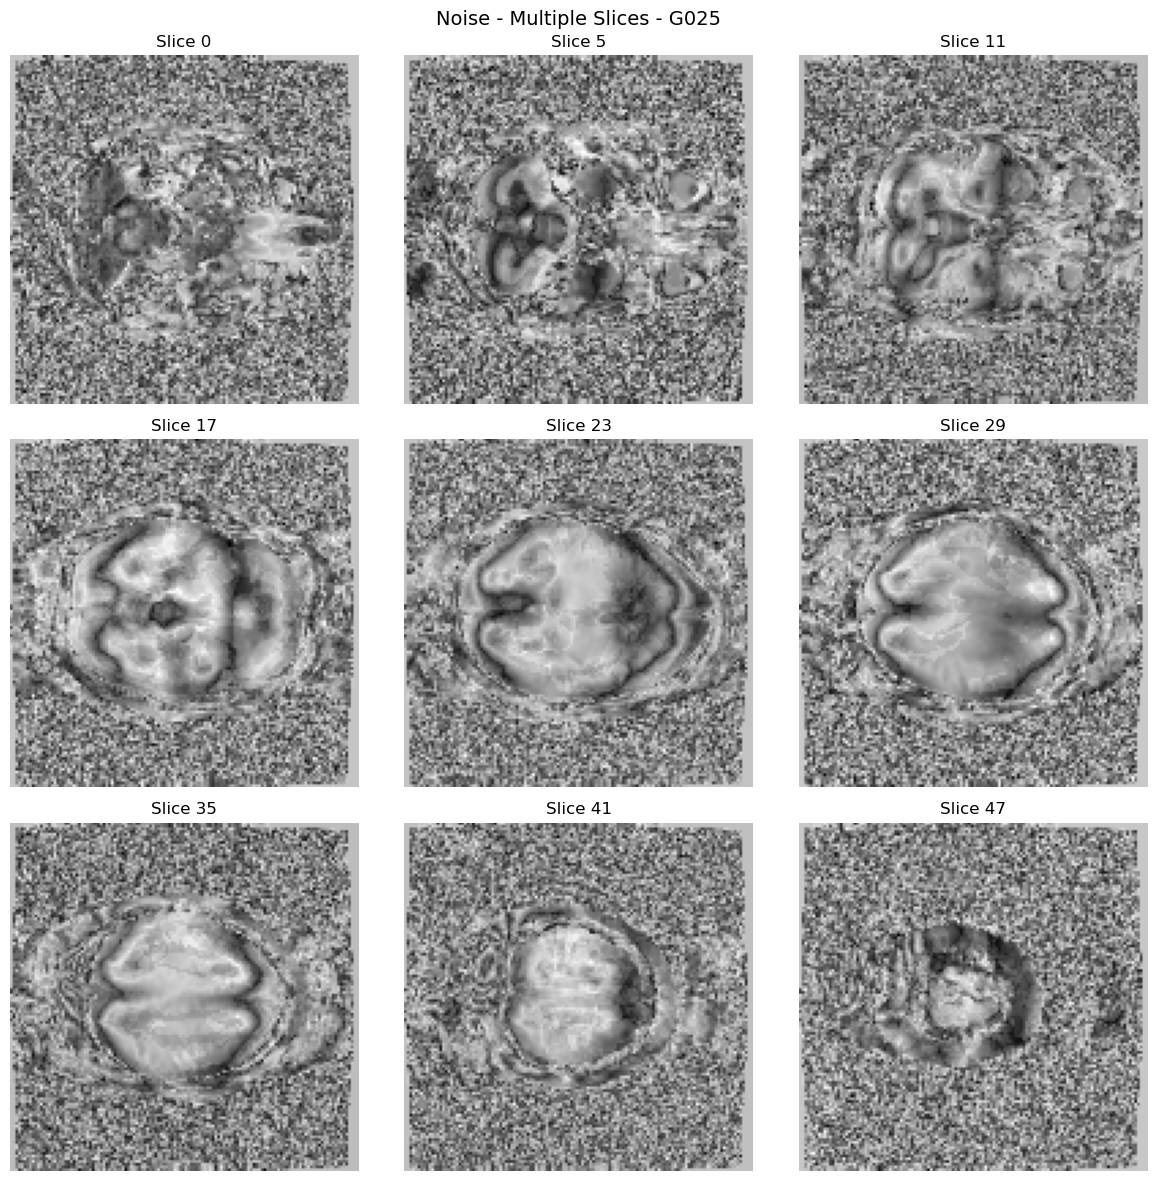

Processing complete!
Noise shape: (128, 128, 48)
Noise scaled shape: (128, 128, 48)
T2noise shape: (128, 128, 48)


In [9]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat, savemat

def process_mri_noise_profile(input_mat, save_dir):
    """
    Obtain noise profile from MRI data
    Translated from MATLAB code by Helen Liang
    
    Args:
        input_mat (str): Path to magimg.mat file
        save_dir (str): Directory to save the noise profile outputs
    """
    
    # Extract subject name from the input path
    # Get the parent directory of the .mat file
    parent_dir = os.path.dirname(input_mat)
    subject_name = os.path.basename(parent_dir)
    print(f"Subject name: {subject_name}")
    
    # Load the magimg.mat file
    print(f"Loading: {input_mat}")
    data = loadmat(input_mat)
    magimg = data['magimg']
    
    print(f"magimg shape: {magimg.shape}")
    print(f"Number of dimensions: {magimg.ndim}")
    
    # Adjust the mean calculation based on actual dimensions
    # MATLAB: t2stack = mean(mean(mean(magimg,6),5),4);
    # Need to adapt based on actual array dimensions
    if magimg.ndim == 6:
        # Original case: mean across dimensions 6, 5, and 4 (0-indexed: 5, 4, 3)
        t2stack = np.mean(np.mean(np.mean(magimg, axis=5), axis=4), axis=3)
        noise_reference = magimg[:, :, :, 0, 3]  # magimg(:,:,:,1,4) in MATLAB
    elif magimg.ndim == 5:
        # Adapted case: mean across dimensions 5 and 4 (0-indexed: 4, 3)
        t2stack = np.mean(np.mean(magimg, axis=4), axis=3)
        noise_reference = magimg[:, :, :, 0, 3]  # magimg(:,:,:,1,4) in MATLAB
    elif magimg.ndim == 4:
        # Further adapted case: mean across dimension 4 (0-indexed: 3)
        t2stack = np.mean(magimg, axis=3)
        noise_reference = magimg[:, :, :, 0]  # magimg(:,:,:,1) in MATLAB
    else:
        raise ValueError(f"Unexpected number of dimensions: {magimg.ndim}")
    
    print(f"t2stack shape: {t2stack.shape}")
    
    # Calculate noise
    # MATLAB: noise = t2stack - abs(magimg(:,:,:,1,4));
    # Note: MATLAB uses 1-based indexing, Python uses 0-based
    noise = t2stack - np.abs(noise_reference)
    
    # Scale noise by 1000
    noise_scaled = noise * 1000
    
    # Calculate t2noise
    t2noise = t2stack + noise
    
    # Create save directory if it doesn't exist
    os.makedirs(save_dir, exist_ok=True)
    
    # Save the results
    filename = os.path.join(save_dir, f"{subject_name}_noise.mat")
    
    # Save to .mat file (MATLAB compatible)
    savemat(filename, {
        'noise': noise,
        'noise_scaled': noise_scaled,
        't2noise': t2noise
    })
    
    print(f"Noise saved as: {filename}")
    
    # Visualize the original magimg data
    visualize_magimg(magimg, subject_name)
    
    # Visualize the results
    visualize_results(t2stack, noise, t2noise, subject_name)
    
    return noise, noise_scaled, t2noise

def visualize_magimg(magimg, subject_name):
    """
    Visualize the original magimg data structure
    Shows different dimensions and slices to understand the data
    """
    print(f"\n=== MAGIMG VISUALIZATION ===")
    print(f"Shape: {magimg.shape}")
    print(f"Data type: {magimg.dtype}")
    print(f"Value range: {np.min(magimg):.4f} to {np.max(magimg):.4f}")
    
    # Choose middle indices for each dimension
    dims = magimg.shape
    middle_indices = [d//2 for d in dims]
    
    if len(dims) == 5:  # 5D array
        h, w, z, t, phase = dims
        print(f"Dimensions: Height={h}, Width={w}, Slices={z}, Time/Echo={t}, Phase={phase}")
        
        # Show different slices and phases
        fig, axes = plt.subplots(2, 3, figsize=(15, 10))
        fig.suptitle(f'MAGIMG Data Structure - {subject_name}', fontsize=14)
        
        # Show middle slice, different time/echo points
        for i in range(min(3, t)):
            slice_data = np.abs(magimg[:, :, middle_indices[2], i, middle_indices[4]])
            im = axes[0, i].imshow(slice_data, cmap='gray')
            axes[0, i].set_title(f'Time/Echo {i}, Phase {middle_indices[4]}')
            axes[0, i].axis('off')
            plt.colorbar(im, ax=axes[0, i])
        
        # Show middle slice, different phases
        for i in range(min(3, phase)):
            slice_data = np.abs(magimg[:, :, middle_indices[2], middle_indices[3], i])
            im = axes[1, i].imshow(slice_data, cmap='gray')
            axes[1, i].set_title(f'Time/Echo {middle_indices[3]}, Phase {i}')
            axes[1, i].axis('off')
            plt.colorbar(im, ax=axes[1, i])
        
        plt.tight_layout()
        plt.show()
        
        # Show multiple z-slices for one time/phase combination
        show_magimg_slices(magimg, subject_name, middle_indices)
        
    elif len(dims) == 6:  # 6D array
        h, w, z, t, phase1, phase2 = dims
        print(f"Dimensions: Height={h}, Width={w}, Slices={z}, Time/Echo={t}, Phase1={phase1}, Phase2={phase2}")
        
        # Show different combinations
        fig, axes = plt.subplots(2, 3, figsize=(15, 10))
        fig.suptitle(f'MAGIMG Data Structure (6D) - {subject_name}', fontsize=14)
        
        for i in range(min(3, t)):
            slice_data = np.abs(magimg[:, :, middle_indices[2], i, middle_indices[4], middle_indices[5]])
            im = axes[0, i].imshow(slice_data, cmap='gray')
            axes[0, i].set_title(f'Time/Echo {i}')
            axes[0, i].axis('off')
            plt.colorbar(im, ax=axes[0, i])
        
        for i in range(min(3, phase1)):
            slice_data = np.abs(magimg[:, :, middle_indices[2], middle_indices[3], i, middle_indices[5]])
            im = axes[1, i].imshow(slice_data, cmap='gray')
            axes[1, i].set_title(f'Phase1 {i}')
            axes[1, i].axis('off')
            plt.colorbar(im, ax=axes[1, i])
        
        plt.tight_layout()
        plt.show()
    
    else:  # Other dimensions
        print(f"Unexpected dimensions: {dims}")
        # Show basic visualization for any other case
        if len(dims) >= 3:
            fig, ax = plt.subplots(1, 1, figsize=(8, 8))
            slice_data = np.abs(magimg[:, :, middle_indices[2]] if len(dims) > 2 else magimg[:, :])
            im = ax.imshow(slice_data, cmap='gray')
            ax.set_title(f'MAGIMG - Slice {middle_indices[2] if len(dims) > 2 else "2D"}')
            ax.axis('off')
            plt.colorbar(im, ax=ax)
            plt.show()

def show_magimg_slices(magimg, subject_name, middle_indices, num_slices=9):
    """
    Show multiple z-slices of magimg for a specific time/phase combination
    """
    total_slices = magimg.shape[2]
    slice_indices = np.linspace(0, total_slices-1, num_slices, dtype=int)
    
    # Use first time point and middle phase
    time_idx = 0
    if len(magimg.shape) == 5:
        phase_idx = middle_indices[4]
        data_4d = magimg[:, :, :, time_idx, phase_idx]
        title_suffix = f"Time/Echo {time_idx}, Phase {phase_idx}"
    elif len(magimg.shape) == 6:
        phase1_idx = middle_indices[4] 
        phase2_idx = middle_indices[5]
        data_4d = magimg[:, :, :, time_idx, phase1_idx, phase2_idx]
        title_suffix = f"Time {time_idx}, Phase1 {phase1_idx}, Phase2 {phase2_idx}"
    
    fig, axes = plt.subplots(3, 3, figsize=(12, 12))
    fig.suptitle(f'MAGIMG Multiple Slices - {subject_name}\n{title_suffix}', fontsize=14)
    
    for i, slice_idx in enumerate(slice_indices):
        row, col = i // 3, i % 3
        slice_data = np.abs(data_4d[:, :, slice_idx])
        im = axes[row, col].imshow(slice_data, cmap='gray')
        axes[row, col].set_title(f'Slice {slice_idx}')
        axes[row, col].axis('off')
    
    plt.tight_layout()
    plt.show()
    
    # Show magnitude and phase information if data is complex
    if np.iscomplexobj(magimg):
        show_magnitude_phase(magimg, subject_name, middle_indices)

def show_magnitude_phase(magimg, subject_name, middle_indices):
    """
    Show magnitude and phase information for complex data
    """
    # Choose a representative slice
    z_slice = middle_indices[2]
    time_idx = 0
    
    if len(magimg.shape) == 5:
        phase_idx = middle_indices[4]
        complex_data = magimg[:, :, z_slice, time_idx, phase_idx]
    elif len(magimg.shape) == 6:
        phase1_idx = middle_indices[4]
        phase2_idx = middle_indices[5] 
        complex_data = magimg[:, :, z_slice, time_idx, phase1_idx, phase2_idx]
    
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    fig.suptitle(f'MAGIMG - Magnitude and Phase - {subject_name}', fontsize=14)
    
    # Magnitude
    magnitude = np.abs(complex_data)
    im1 = axes[0].imshow(magnitude, cmap='gray')
    axes[0].set_title(f'Magnitude (Slice {z_slice})')
    axes[0].axis('off')
    plt.colorbar(im1, ax=axes[0])
    
    # Phase
    phase = np.angle(complex_data)
    im2 = axes[1].imshow(phase, cmap='hsv')
    axes[1].set_title(f'Phase (Slice {z_slice})')
    axes[1].axis('off')
    plt.colorbar(im2, ax=axes[1])
    
    plt.tight_layout()
    plt.show()

def visualize_results(t2stack, noise, t2noise, subject_name):
    """
    Visualize t2stack, noise, and t2noise
    Similar to MATLAB's figure;im() commands
    """
    # Choose a middle slice for visualization
    middle_slice = t2stack.shape[2] // 2
    
    # Create figure with subplots
    fig, axes = plt.subplots(2, 2, figsize=(12, 10))
    fig.suptitle(f'MRI Noise Analysis - {subject_name}', fontsize=14)
    
    # Display t2stack
    im1 = axes[0, 0].imshow(t2stack[:, :, middle_slice], cmap='gray')
    axes[0, 0].set_title(f'T2 Stack (slice {middle_slice})')
    axes[0, 0].axis('off')
    plt.colorbar(im1, ax=axes[0, 0])
    
    # Display noise
    im2 = axes[0, 1].imshow(noise[:, :, middle_slice], cmap='gray')
    axes[0, 1].set_title(f'Noise (slice {middle_slice})')
    axes[0, 1].axis('off')
    plt.colorbar(im2, ax=axes[0, 1])
    
    # Display t2noise
    im3 = axes[1, 0].imshow(t2noise[:, :, middle_slice], cmap='gray')
    axes[1, 0].set_title(f'T2 + Noise (slice {middle_slice})')
    axes[1, 0].axis('off')
    plt.colorbar(im3, ax=axes[1, 0])
    
    # Display noise statistics
    axes[1, 1].hist(noise.flatten(), bins=50, alpha=0.7)
    axes[1, 1].set_title('Noise Distribution')
    axes[1, 1].set_xlabel('Noise Value')
    axes[1, 1].set_ylabel('Frequency')
    axes[1, 1].grid(True, alpha=0.3)
    
    # Add statistics text
    noise_stats = f'Mean: {np.mean(noise):.4f}\nStd: {np.std(noise):.4f}\nMin: {np.min(noise):.4f}\nMax: {np.max(noise):.4f}'
    axes[1, 1].text(0.65, 0.95, noise_stats, transform=axes[1, 1].transAxes, 
                    verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))
    
    plt.tight_layout()
    plt.show()
    
    # Create an additional figure showing multiple slices
    show_multiple_slices(t2stack, noise, subject_name)

def show_multiple_slices(t2stack, noise, subject_name, num_slices=9):
    """
    Show multiple slices in a grid for better visualization
    """
    total_slices = t2stack.shape[2]
    slice_indices = np.linspace(0, total_slices-1, num_slices, dtype=int)
    
    # T2Stack slices
    fig1, axes1 = plt.subplots(3, 3, figsize=(12, 12))
    fig1.suptitle(f'T2 Stack - Multiple Slices - {subject_name}', fontsize=14)
    
    for i, slice_idx in enumerate(slice_indices):
        row, col = i // 3, i % 3
        im = axes1[row, col].imshow(t2stack[:, :, slice_idx], cmap='gray')
        axes1[row, col].set_title(f'Slice {slice_idx}')
        axes1[row, col].axis('off')
    
    plt.tight_layout()
    plt.show()
    
    # Noise slices
    fig2, axes2 = plt.subplots(3, 3, figsize=(12, 12))
    fig2.suptitle(f'Noise - Multiple Slices - {subject_name}', fontsize=14)
    
    for i, slice_idx in enumerate(slice_indices):
        row, col = i // 3, i % 3
        im = axes2[row, col].imshow(noise[:, :, slice_idx], cmap='gray')
        axes2[row, col].set_title(f'Slice {slice_idx}')
        axes2[row, col].axis('off')
    
    plt.tight_layout()
    plt.show()

# Example usage with your specified paths
if __name__ == "__main__":
    input_mat = "/home/smooi/Desktop/mre_noise_unprocessed/G025/magimg.mat"
    save_dir = "/home/smooi/Desktop/mre_noise_unprocessed/G025"
    
    # Process the noise profile
    noise, noise_scaled, t2noise = process_mri_noise_profile(input_mat, save_dir)
    
    print("Processing complete!")
    print(f"Noise shape: {noise.shape}")
    print(f"Noise scaled shape: {noise_scaled.shape}")
    print(f"T2noise shape: {t2noise.shape}")

In [10]:
other_noise = "/home/smooi/Desktop/noise_profile/2023-U7487-0411-NP-01_noise.mat"

Variables found in the .mat file:
['__header__', '__version__', '__globals__', 'noise', 'noise_scaled', 't2noise']


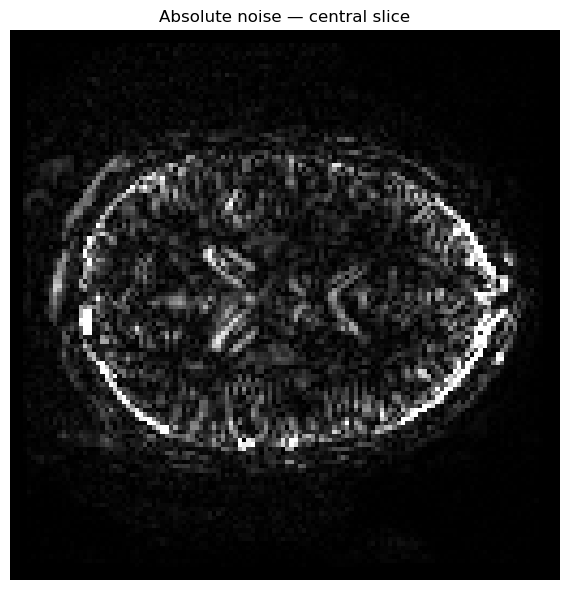

In [9]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
from pathlib import Path

mat_path = Path("/home/smooi/Desktop/noise_profile/2023-U7487-0411-NP-01_noise.mat")

# Load the .mat file
data = loadmat(mat_path)

# The keys of the dictionary are the variable names stored in the file
print("Variables found in the .mat file:")
print(list(data.keys())) 

# --- load 'noise' from MAT (v7); fall back to 'noise_scaled' if needed
m = sio.loadmat(mat_path)
key = next((k for k in m.keys() if k.lower() == "noise"), None)
if key is None:
    key = next((k for k in m.keys() if k.lower() == "noise_scaled"), None)
if key is None:
    raise KeyError("No 'noise' or 'noise_scaled' variable found in MAT file.")

noise = np.asarray(m[key], dtype=np.float64)
vol = np.abs(noise)

# --- pick a 2D view ---
if vol.ndim == 2:
    img = vol
elif vol.ndim >= 3:
    z = vol.shape[2] // 2  # central axial slice
    img = vol[:, :, z]
else:
    raise ValueError(f"Unexpected noise ndim={vol.ndim}")

# --- robust display range (global, excluding zeros if present) ---
valid = img[img != 0]
if valid.size == 0:
    valid = img.ravel()
vmin, vmax = np.percentile(valid, [1, 99])

plt.figure(figsize=(6,6))
plt.imshow(img, cmap="gray", vmin=vmin, vmax=vmax)
plt.title("Absolute noise — central slice")
plt.axis("off")
plt.tight_layout()
plt.show()


In [7]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
from pathlib import Path

mat_path = Path("/home/smooi/Desktop/mre_noise_unprocessed/S038/STE_018_scan1_imgraw.mat")

# --- load 'noise' from MAT (v7); fall back to 'noise_scaled' if needed
m = sio.loadmat(mat_path)
key = next((k for k in m.keys() if k.lower() == "noise"), None)
if key is None:
    key = next((k for k in m.keys() if k.lower() == "noise_scaled"), None)
if key is None:
    raise KeyError("No 'noise' or 'noise_scaled' variable found in MAT file.")

noise = np.asarray(m[key], dtype=np.float64)
vol = np.abs(noise)

# --- pick a 2D view ---
if vol.ndim == 2:
    img = vol
elif vol.ndim >= 3:
    z = vol.shape[2] // 2  # central axial slice
    img = vol[:, :, z]
else:
    raise ValueError(f"Unexpected noise ndim={vol.ndim}")

# --- robust display range (global, excluding zeros if present) ---
valid = img[img != 0]
if valid.size == 0:
    valid = img.ravel()
vmin, vmax = np.percentile(valid, [1, 99])

plt.figure(figsize=(6,6))
plt.imshow(img, cmap="gray", vmin=vmin, vmax=vmax)
plt.title("Absolute noise — central slice")
plt.axis("off")
plt.tight_layout()
plt.show()


KeyError: "No 'noise' or 'noise_scaled' variable found in MAT file."

In [5]:
import os
import numpy as np
from scipy.io import loadmat, savemat

def process_mre_noise_profile(input_mat, save_dir):
    """
    Obtain noise profile from MRE data.
    This version is robust and handles 4D, 5D, and 6D input arrays.
    
    Args:
        input_mat (str): Path to magimg.mat file.
        save_dir (str): Directory to save the noise profile outputs.
    """
    
    # Extract subject name from the input path
    parent_dir = os.path.dirname(input_mat)
    subject_name = os.path.basename(parent_dir)
    print(f"Subject name: {subject_name}")
    
    # Load the magimg.mat file
    print(f"Loading: {input_mat}")
    data = loadmat(input_mat)
    magimg = data['magimg']
    
    # magimg is the magnitude image 
    print(f"magimg shape: {magimg.shape}")
    # magimg shape: (128, 128, 48, 3, 4) | 4 --> phase offset 
    print(f"Number of dimensions: {magimg.ndim}")
    
    # We wants to implement the below matlab logic:
    # % figure;im(magimg(:,:,30,:,:,:))
    # t2stack=mean(mean(mean(magimg,6),5),4);
    # % figure;im(t2stack(:,:,30));
    # size(magimg)
    # noise = t2stack-abs(magimg(:,:,:,1,4));
    
    # diff: matlab is 1-based and python is 0-based
    
    if magimg.ndim == 6:
        print("Processing as a 6-dimensional array.")
        # Original case: mean across dimensions 6, 5, and 4 (0-indexed: 5, 4, 3)
        t2stack = np.mean(magimg, axis=(5, 4, 3))
        noise_reference = magimg[:, :, :, 0, 3]  # magimg(:,:,:,1,4) in MATLAB, 
        # retriving the scans in the direction [0] and in the four offsets [3]
        
    elif magimg.ndim == 5:
        print("Processing as a 5-dimensional array.")
        # This is the logic that will run for your G025 data.
        # Adapted case: mean across dimensions 5 and 4 (0-indexed: 4, 3)
        t2stack = np.mean(magimg, axis=(4, 3))
        noise_reference = magimg[:, :, :, 0, 3]  # magimg(:,:,:,1,4) in MATLAB
        # debug print noise_reference shape
        print(noise_reference.min(), noise_reference.max(), noise_reference.shape)
        
        
    elif magimg.ndim == 4:
        print("Processing as a 4-dimensional array.")
        # Further adapted case: mean across dimension 4 (0-indexed: 3)
        t2stack = np.mean(magimg, axis=3)
        noise_reference = magimg[:, :, :, 0]  # magimg(:,:,:,1) in MATLAB
    else:
        # If the array is not 4D, 5D, or 6D, raise an error.
        raise ValueError(f"Unexpected number of dimensions: {magimg.ndim}")
    
    print(f"t2stack shape after processing: {t2stack.shape}")
    
    # Calculate noise
    noise = t2stack - np.abs(noise_reference)
    
    # DEBUG to print noise
    print(noise)
    
    # Scale noise by 1000
    noise_scaled = noise * 1000
    
    # Calculate t2noise
    t2noise = t2stack + noise
    
    # Create save directory if it doesn't exist
    os.makedirs(save_dir, exist_ok=True)
    
    # Save the results
    filename = os.path.join(save_dir, f"{subject_name}_noise.mat")
    
    savemat(filename, {
        'noise': noise,
        'noise_scaled': noise_scaled,
        't2noise': t2noise
    })
    
    print(f"Noise saved as: {filename}")
    
    
    return noise, noise_scaled, t2noise


if __name__ == "__main__":
    input_mat = "/home/smooi/Desktop/mre_noise_unprocessed/G025/magimg.mat"
    save_dir = "/home/smooi/Desktop/mre_noise_unprocessed/G025"
    
    process_mre_noise_profile(input_mat, save_dir)
    
    print("\nProcessing complete!")

Subject name: G025
Loading: /home/smooi/Desktop/mre_noise_unprocessed/G025/magimg.mat


magimg shape: (128, 128, 48, 3, 4)
Number of dimensions: 5
Processing as a 5-dimensional array.
-3141 3141 (128, 128, 48)
t2stack shape after processing: (128, 128, 48)
[[[    0.             0.             0.         ...     0.
       0.             0.        ]
  [    0.             0.             0.         ...     0.
       0.             0.        ]
  [    0.             0.             0.         ...     0.
       0.             0.        ]
  ...
  [    0.             0.             0.         ...     0.
       0.             0.        ]
  [    0.             0.             0.         ...     0.
       0.             0.        ]
  [    0.             0.             0.         ...     0.
       0.             0.        ]]

 [[    0.             0.             0.         ...     0.
       0.             0.        ]
  [    0.             0.             0.         ...     0.
       0.             0.        ]
  [    0.             0.             0.         ...     0.
       0.           

In [12]:
from scipy.io import loadmat

# Path to the file your script created
filepath = "/home/smooi/Desktop/mre_noise_unprocessed/S038/STE_018_scan1_imgraw.mat"

# Load the .mat file
data = loadmat(filepath)

# The keys of the dictionary are the variable names stored in the file
print("Variables found in the .mat file:")
print(list(data.keys()))

Variables found in the .mat file:
['__header__', '__version__', '__globals__', 'imgraw']


Loading data from: /home/smooi/Desktop/mre_noise_unprocessed/G033/magimg.mat
Data shape: (128, 128, 48, 3, 4)


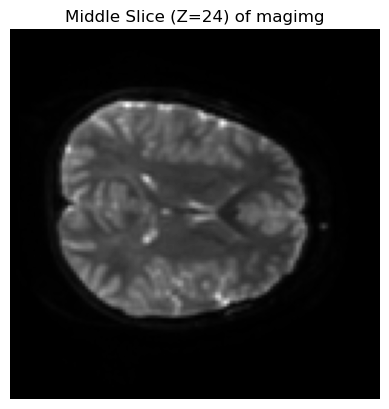

In [19]:
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt
from pathlib import Path

# 1. Define the path to your .mat file
mat_path = Path("/home/smooi/Desktop/mre_noise_unprocessed/G033/magimg.mat")

# 2. Load the data
print(f"Loading data from: {mat_path}")
mat_data = loadmat(mat_path)
magimg = mat_data['magimg']
print(f"Data shape: {magimg.shape}")

# 3. Select a 2D slice to display
# The shape is (128, 128, 48, 3, 4).
# We will select:
#   :   -> all 128 pixels in the X dimension
#   :   -> all 128 pixels in the Y dimension
#   24  -> the 25th slice (middle slice of the 48)
#   0   -> the first MEG direction
#   0   -> the first phase offset
image_slice = magimg[:, :, 24, 0, 0]

# 4. Display the image
plt.imshow(image_slice, cmap='gray')
plt.title("Middle Slice (Z=24) of magimg")
plt.axis('off')  # Hide the axes
plt.show()

Mag slice=24 dir=0 ph=0 (0–1 norm): shape=(160, 160, 4) dtype=float64 min=0.000e+00 max=1.000e+00 nan=0 p1/p99=5.694e-09/1.000e+00


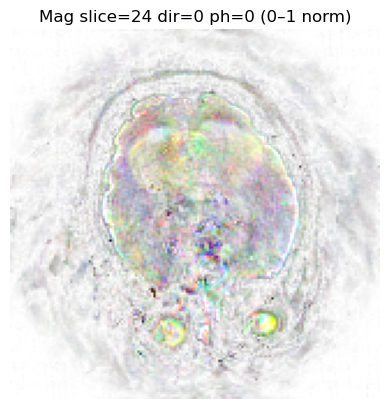

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-3.141513..3.141484].


Phase slice=24 dir=0 ph=0: shape=(160, 160, 4) dtype=float32 min=-3.142e+00 max=3.141e+00 nan=0 p1/p99=-3.080e+00/3.074e+00


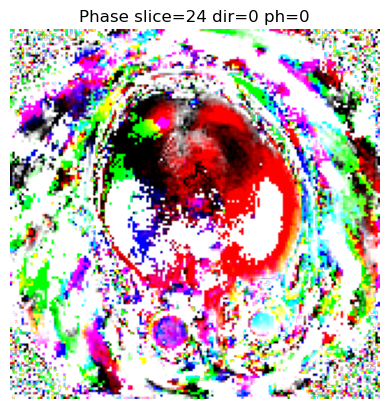

In [ ]:
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt
from pathlib import Path

mat_path = Path("/home/smooi/Desktop/mre_noise_unprocessed/S038/STE_018_scan1_imgraw.mat")
m = loadmat(mat_path)
imgraw = m["imgraw"]  # (128,128,48,3,4) complex64

slc, meg, ph = 24, 0, 0
img = imgraw[:, :, slc, meg, ph]

def show_vis(arr, title, cmap='gray', vmin=None, vmax=None):
    print(f"{title}: shape={arr.shape} dtype={arr.dtype} "
          f"min={np.nanmin(arr):.3e} max={np.nanmax(arr):.3e} "
          f"nan={np.isnan(arr).sum()} p1/p99={np.nanpercentile(arr,1):.3e}/{np.nanpercentile(arr,99):.3e}")
    plt.figure()
    plt.imshow(arr, cmap=cmap, vmin=vmin, vmax=vmax, origin='lower')
    plt.title(title); plt.axis('off'); plt.show()

# 1) Magnitude with robust scaling
mag = np.abs(img).astype(np.float32)
p1, p99 = np.nanpercentile(mag, [1, 99])
if not np.isfinite(p1) or not np.isfinite(p99) or p99 <= p1:
    p1, p99 = float(np.nanmin(mag)), float(np.nanmax(mag))
# Normalize 0–1 safely
mag01 = np.clip((mag - p1) / (max(p99 - p1, 1e-9)), 0, 1)
show_vis(mag01, f"Mag slice={slc} dir={meg} ph={ph} (0–1 norm)", vmin=0, vmax=1)

# 2) Phase (often more informative for MRE waves)
phase = np.angle(img).astype(np.float32)
show_vis(phase, f"Phase slice={slc} dir={meg} ph={ph}", cmap='twilight', vmin=-np.pi, vmax=np.pi)

# 3) If still blank, scan for a non-constant slice/direction/phase
if np.allclose(mag, mag.mean()) or (mag01.max() - mag01.min() < 1e-6):
    # find the (slc,meg,ph) with the widest dynamic range
    best = None; best_rng = -1
    for d in range(imgraw.shape[2]):
        for g in range(imgraw.shape[3]):
            for k in range(imgraw.shape[4]):
                mm = np.abs(imgraw[:, :, d, g, k])
                rng = np.nanpercentile(mm, 99) - np.nanpercentile(mm, 1)
                if rng > best_rng:
                    best_rng, best = rng, (d, g, k)
    d,g,k = best
    cand = np.abs(imgraw[:, :, d, g, k]).astype(np.float32)
    q1,q99 = np.nanpercentile(cand, [1,99]); cand01 = np.clip((cand-q1)/max(q99-q1,1e-9),0,1)
    show_vis(cand01, f"Best slice (d={d}, dir={g}, ph={k})", vmin=0, vmax=1)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from typing import Optional, Tuple, Literal, Union
from scipy.io import loadmat

def _load_imgraw(src: Union[str, Path, np.ndarray], key: str = "imgraw") -> np.ndarray:
    """Load imgraw from .mat or pass-through if already ndarray."""
    if isinstance(src, np.ndarray):
        return src
    src = Path(src)
    try:
        m = loadmat(src)
        arr = m[key]
    except NotImplementedError:
        # Likely MATLAB v7.3 (HDF5)
        import h5py
        with h5py.File(src, "r") as f:
            # h5py keys are often stored transposed; try common patterns
            dset = f[key][()] if key in f else f[list(f.keys())[0]][()]
            arr = np.array(dset)
            # h5py loads Fortran-ordered; try squeezing and transposing if 5D
            if arr.ndim == 5:
                arr = np.transpose(arr, (2, 1, 0, 3, 4))  # heuristic; adjust if needed
    return arr

def _percentile_window(x: np.ndarray, p1: float = 1, p99: float = 99) -> Tuple[float, float]:
    a, b = np.nanpercentile(x, [p1, p99])
    if not np.isfinite(a) or not np.isfinite(b) or b <= a:
        a, b = float(np.nanmin(x)), float(np.nanmax(x))
    if b - a < 1e-12:  # avoid degenerate window
        b = a + 1.0
    return a, b

def _best_slice_by_range(imgraw: np.ndarray) -> Tuple[int, int, int]:
    """Return (slice, dir, phase) with largest 99–1 percentile magnitude range."""
    _, _, D, G, K = imgraw.shape
    best, best_rng = (0, 0, 0), -1.0
    for d in range(D):
        for g in range(G):
            for k in range(K):
                mag = np.abs(imgraw[:, :, d, g, k])
                r = np.nanpercentile(mag, 99) - np.nanpercentile(mag, 1)
                if r > best_rng:
                    best_rng, best = r, (d, g, k)
    return best

def show_imgraw(
    src: Union[str, Path, np.ndarray],
    slc: Optional[int] = None,
    meg: Optional[int] = None,
    ph: Optional[int]  = None,
    mode: Literal["mag", "phase", "real", "imag"] = "mag",
    robust: bool = True,
    prc: Tuple[float, float] = (1, 99),
    origin: str = "lower",
    cmap: Optional[str] = None,
    show: bool = True,
    save_path: Optional[Union[str, Path]] = None,
) -> np.ndarray:
    """
    Visualize a single 2D frame from complex imgraw [X,Y,Z,MEG,PHASE].

    Returns the displayed 2D array (after transform), useful for further ops.
    """
    imgraw = _load_imgraw(src)
    assert imgraw.ndim == 5, f"Expected 5D [X,Y,Z,MEG,PHASE], got {imgraw.shape}"
    X, Y, D, G, K = imgraw.shape

    # Choose slice/dir/phase
    if slc is None or meg is None or ph is None:
        d, g, k = _best_slice_by_range(imgraw)
        slc = d if slc is None else slc
        meg = g if meg is None else meg
        ph  = k if ph  is None else ph

    frame = imgraw[:, :, slc, meg, ph]
    if np.iscomplexobj(frame):
        if mode == "mag":
            vis = np.abs(frame)
            _cmap = cmap or "gray"
            vmin, vmax = _percentile_window(vis, *prc) if robust else (vis.min(), vis.max())
        elif mode == "phase":
            vis = np.angle(frame)
            _cmap = cmap or "twilight"
            vmin, vmax = (-np.pi, np.pi)
        elif mode == "real":
            vis = np.real(frame)
            _cmap = cmap or "gray"
            vmin, vmax = _percentile_window(vis, *prc) if robust else (vis.min(), vis.max())
        else:  # "imag"
            vis = np.imag(frame)
            _cmap = cmap or "gray"
            vmin, vmax = _percentile_window(vis, *prc) if robust else (vis.min(), vis.max())
    else:
        vis = frame.astype(np.float32)
        _cmap = cmap or "gray"
        vmin, vmax = _percentile_window(vis, *prc) if robust else (vis.min(), vis.max())

    # Quick stats (helps diagnose “white blank” issues)
    print(f"[imgraw] shape={imgraw.shape} dtype={imgraw.dtype}")
    print(f"[view ] slice={slc} dir={meg} phase={ph} mode={mode}")
    print(f"[stats] min={np.nanmin(vis):.3e} max={np.nanmax(vis):.3e} "
          f"p{prc[0]}={np.nanpercentile(vis, prc[0]):.3e} p{prc[1]}={np.nanpercentile(vis, prc[1]):.3e} "
          f"nan={np.isnan(vis).sum()}")

    # Render
    if show or save_path is not None:
        plt.figure()
        plt.imshow(vis.astype(np.float32), cmap=_cmap, vmin=vmin, vmax=vmax, origin=origin)
        plt.title(f"imgraw: slice={slc}, dir={meg}, ph={ph}, mode={mode}")
        plt.axis("off")
        if save_path is not None:
            save_path = Path(save_path)
            save_path.parent.mkdir(parents=True, exist_ok=True)
            plt.savefig(save_path, bbox_inches="tight", pad_inches=0, dpi=150)
        if show:
            plt.show()
        else:
            plt.close()

    return vis
